# Análisis de Series Temporales . Trabajo Final

## Introducción
En el presente cuaderno se busca mostrar de manera suscinta el modo en que diversas técnicas de análiss de series temporales operan sobre señales de infrasonido y sismografo. Para ello se exponen brevemente los fundamentos de cada técnica, y se muestra su implementación en Python. Para los ejemplos se utilizan señales de infrasonido y sismógrafo, en una traza temporal que registra un evento volcano-tectónico (VT), ocurrido en el volcán Peteroa, en el departamento de Malargüe, provincia de Mendoza, el día 28 de diciembre de 2017.<br>

Las técnicas utilizadas son 
1. Espectrograma (FFT)
2. Transformada Wavelet Contínua (CWT)
3. Descomposición Empírica de Modos (EMD)

## 1. Transformada de Fourier

La transformada de Fourier convierte una señal en el dominio del tiempo al dominio de la frecuencia, integrando en todo el rango temporal. Sin embargo, si la señal no es estacionaria, es decir, si el contenido de frecuencias es función del tiempo, no es posible discernir el momento de aparición de una frecuencia determinada.

$$ F(\omega)=\int^{-\infty}_{+\infty} f(t)^{-i\omega t} dt$$



### 1.1 Transformada de Fourier por ventanas (Windowed Fourier Transform)

La transformada de Fourier por ventanas, trata de sobreponerse a esta limitación, utilizando una ventana $(t-u)$. El tipo y ancho de la ventana se elijen de modo de aplicar la transformación sobre una porción pequeña de la señal $f(t)$. La transformada tiene entonces dos parámetros independientes, uno es el tiemppo $t$ que indica la porción en la que se centrala ventana; el otro es parámetro es la frecuencia $xi$.

$$ F(s, \xi)=\int^{-\infty}_{+\infty} f(t) \:w(t-u)^{-i\xi t} dt$$

Sin embargo, esta técnicas tiene un número de limitaciones de consideración:
* La menor frecuencia que es pasible de detección está determinada por el ancho de la ventana $w$, y tiene un periodo igual a $w*dt$
* Todas las frecuencias entre $w*dt$ y $2*dt$ se computan $N$ veces en la mismca traza, lo cual hace de esta una técnica muy poco eficiente en términos computacionales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
with open('20170328_22_time-infra.txt') as time:
    infra_time_str = time.read().splitlines()
print(f'{infra_time_str[0]:<30} ==> {type(infra_time_str[0])}')

infra_time_d64 = np.array(infra_time_str, dtype='datetime64')
print(f'{infra_time_d64[0]:<30} ==> {np.dtype(infra_time_d64[0])}')

infra_time_utc = infra_time_d64.astype('O')
print(f'{str(infra_time_utc[0]):<30} ==> {type(infra_time_utc[0])}')

with open('20170328_22_signal-infra.txt') as signal_str:
    infra_full = list(map(float, signal_str))
print(f'{infra_full[0]:<30} ==> {type(infra_full[0])}')

s_freq = 100

2017-03-28 22:39:44.278077     ==> <class 'str'>
2017-03-28T22:39:44.278077     ==> datetime64[us]
2017-03-28 22:39:44.278077     ==> <class 'datetime.datetime'>
1.19166666667                  ==> <class 'float'>


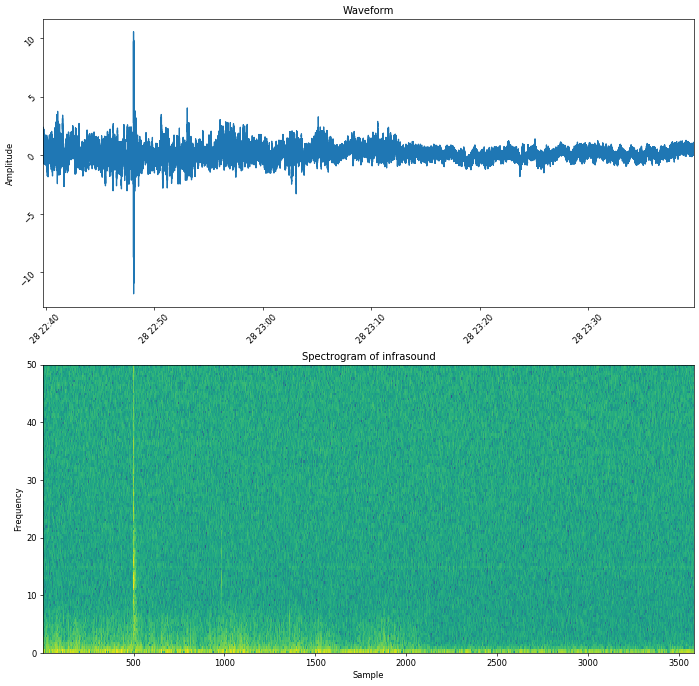

In [3]:
fig_infra = plt.figure(figsize=(14,14), dpi=60) # (width, height) in inches.
ax1, ax2 = fig_infra.subplots(2)

ax1.plot(infra_time_d64,infra_full)
ax1.set_title('Waveform')
ax1.tick_params(labelrotation=45)
#ax1.set_xlabel('Time')
ax1.set_xlim(infra_time_utc[0],infra_time_utc[-1])
ax1.set_ylabel('Amplitude')

ax2.specgram(infra_full,Fs=s_freq)
ax2.set_title('Spectrogram of infrasound')
ax2.set_xlabel('Sample')
ax2.set_ylabel('Frequency')
plt.show()

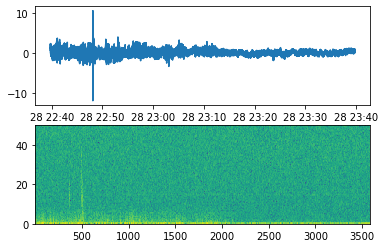

In [9]:
#spectrum : 2-D array    Columns are the periodograms of successive segments.
#freqs : 1-D array    The frequencies corresponding to the rows in spectrum.
#t : 1-D array   The times corresponding to midpoints of segments (i.e., the columns in spectrum).
#im : The image created by imshow containing the spectrogram

fig, (ax1,ax2) = plt.subplots(nrows=2)
ax1.plot(infra_time_d64,infra_full)
Pxx, freqs, bins, im = ax2.specgram(infra_full,Fs=s_freq)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()   

TypeError: 'AxesImage' object is not subscriptable

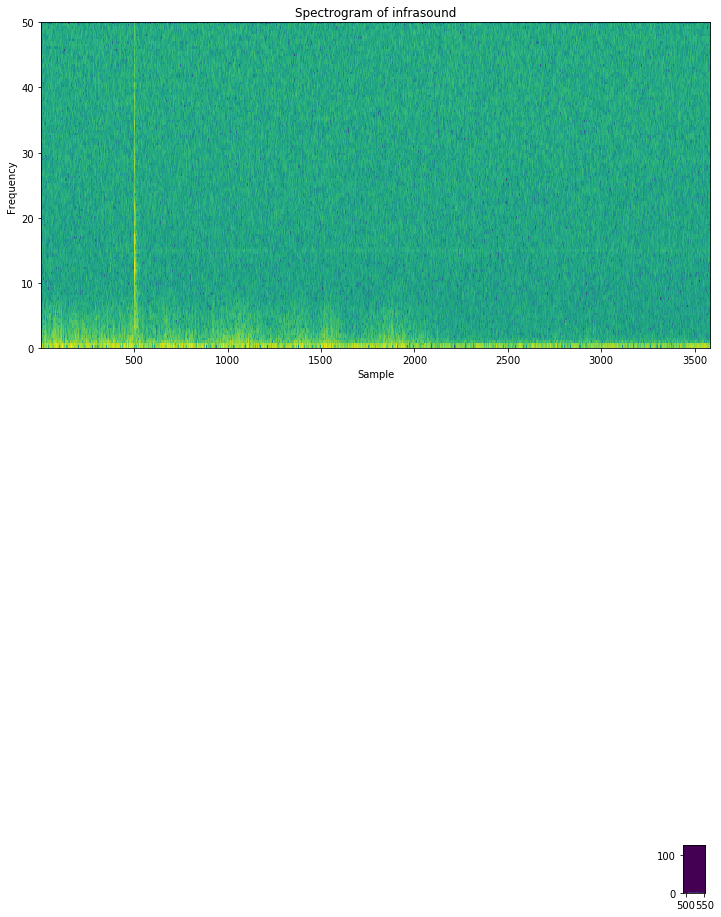

In [53]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

spec, axfull = plt.subplots(figsize=[12, 6])

Pxx, freqs, bins, im = axfull.specgram(infra_full,Fs=s_freq)
axfull.set_title('Spectrogram of infrasound')
axfull.set_xlabel('Sample')
axfull.set_ylabel('Frequency')

axins = zoomed_inset_axes(axfull, 2) #, loc=1)  # zoom = 6
axins.imshow(Pxx, interpolation="nearest", origin="lower") #extent=(450, 550, 0, 50), 

# sub region of the original image
x1, x2, y1, y2 = iminev//100, imaxev//100,0,50
axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)

# fix the number of ticks on the inset axes
#axins.yaxis.get_major_locator().set_params(nbins=7)
#axins.xaxis.get_major_locator().set_params(nbins=7)

#plt.xticks(visible=False)
#plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
#mark_inset(axfull, axins, loc1=2, loc2=4, fc="none", ec="0.5")

#plt.draw()

#axinlet.specgram(infra_full,Fs=s_freq)
#axinlet.set_title('Spectrogram of infrasound')
#axinlet.set_xlim(
#axinlet.set_xlabel('Sample')
#axinlet.set_ylabel('Frequency')

plt.show()

Localizamos la traza y hacemos 3 recortes con los cuales trabajar:
* entre 22:45:00 y 22:55:00
* entre 22:46:30 y 22:52:00
* entre 22:48:00 y 22:49:00

In [14]:
imin = 31450
imax = imin + 10*60*100
Ldelta = imax-imin
iminev = 49382
imaxev = 55382
Sdelta = imaxev - iminev
iminM, imaxM = (iminev-imin)//2+imin , (imaxev-imax)//2+imax
Mdelta = imaxM-iminM
print(infra_time_d64[imin], infra_time_d64[imax], Ldelta)
print(infra_time_d64[iminM], infra_time_d64[imaxM], Mdelta)
print( infra_time_d64[iminev], infra_time_d64[imaxev], Sdelta)

2017-03-28T22:44:59.990391 2017-03-28T22:55:02.313381 60000
2017-03-28T22:46:29.992088 2017-03-28T22:52:01.270133 33000
2017-03-28T22:47:59.996876 2017-03-28T22:49:00.226377 6000


In [6]:
infra_cropL = infra_full[imin:imax+1]
infra_cropM = infra_full[iminM:imaxM+1]
infra_cropS = infra_full[iminev:imaxev+1]

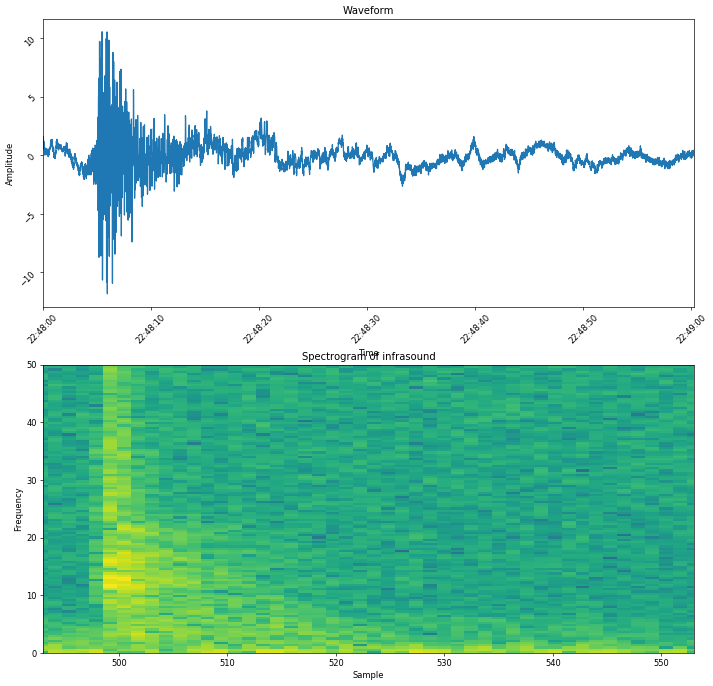

In [7]:
fig_infra_crop = plt.figure(figsize=(14,14), dpi=60) # (width, height) in inches.
ax1, ax2 = fig_infra_crop.subplots(2)
ax1.plot(infra_time_utc,infra_full)
ax1.set_xlim([infra_time_d64[iminev],infra_time_d64[imaxev]])
ax1.set_title('Waveform')
ax1.tick_params(labelrotation=45)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

ax2.specgram(infra_full,Fs=s_freq)
ax2.set_title('Spectrogram of infrasound')
ax2.set_xlim([iminev//100,imaxev//100])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Frequency')
plt.show()

# juntar los graficos, hacer inlet o algo así

In [7]:
with open('201729030100-W5745-6C35E4-sismo.txt') as sismo_file:
    sismo_str = sismo_file.read().splitlines()
    sismo_full = list(map(float, sismo_str[1:]))

In [8]:
sismo_start_str = sismo_str[0].split()[3]
sismo_end_str = sismo_str[0].split()[5]

sismo_N = int(sismo_str[0].split()[-2])
sismo_sr = float(sismo_str[0].split()[7])

In [9]:
sismo_start = datetime.strptime(sismo_start_str, '%Y-%m-%dT%H:%M:%S.%fZ')
sismo_end = datetime.strptime(sismo_end_str, '%Y-%m-%dT%H:%M:%S.%fZ')
sismo_delta = (sismo_end - sismo_start) / sismo_N
increments = range(0, sismo_N) * np.array([sismo_delta]*sismo_N)

sismo_time = sismo_start + increments
sismo_d64 = np.array(sismo_time, dtype='datetime64')
print(f'{sismo_d64[0]:<30} ==> {np.dtype(sismo_d64[0])}')
print(f'{sismo_d64[0]:<30} ==> {len(sismo_d64)}')

2017-03-29T01:00:00.000000     ==> datetime64[us]
2017-03-29T01:00:00.000000     ==> 360000


In [10]:
sminev = 288000
smaxev = 294000
smin = sminev-3*60*100
smax = smin + 10*60*100
sminM, smaxM = (sminev-smin)//2+smin , (smaxev-smax)//2+smax
print(sismo_time[smin])
print(sismo_time[sminM])
print(sismo_time[sminev])
print(sismo_time[smax])
print(sismo_time[smaxM])
print(sismo_time[smaxev])

2017-03-29 01:45:00
2017-03-29 01:46:30
2017-03-29 01:48:00
2017-03-29 01:55:00
2017-03-29 01:52:00
2017-03-29 01:49:00


In [11]:
sismo_cropL = sismo_full[smin:smax+1]
sismo_cropM = sismo_full[sminM:smaxM+1]
sismo_cropS = sismo_full[sminev:smaxev+1]

print(f'SismoS: {len(sismo_cropS):<5} ==> InfraS {len(infra_cropS)}')
print(f'SismoM: {len(sismo_cropM):<5} ==> InfraM {len(infra_cropM)}')
print(f'SismoL: {len(sismo_cropL):<5} ==> InfraL {len(infra_cropL)}')

SismoS: 6001  ==> InfraS 6001
SismoM: 33001 ==> InfraM 33001
SismoL: 60001 ==> InfraL 60001


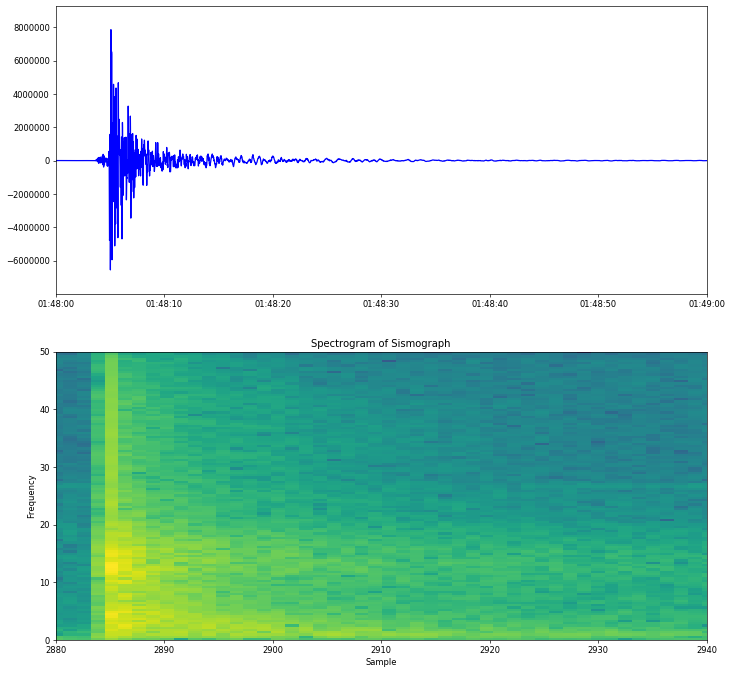

In [12]:
sismo_graph = plt.figure(figsize=[14,14], dpi=60)
sismo_ax, sismo_spec = sismo_graph.subplots(2)

sismo_ax.plot(sismo_time, sismo_full, "b-")
sismo_ax.xaxis_date()
sismo_ax.set_xlim(sismo_time[sminev], sismo_time[smaxev])
sismo_ax.margins(x=0, y=0.1)

sismo_spec.specgram(sismo_full,Fs=s_freq)
sismo_spec.set_title('Spectrogram of Sismograph')
sismo_spec.set_xlim([sminev//100,smaxev//100])
sismo_spec.set_xlabel('Sample')
sismo_spec.set_ylabel('Frequency')
plt.show()

In [13]:
infraN = np.divide(infra_full, max(infra_full))
sismoN = np.divide(sismo_full, max(sismo_full))
sismo_d64N = sismo_d64 - np.timedelta64(3, 'h')

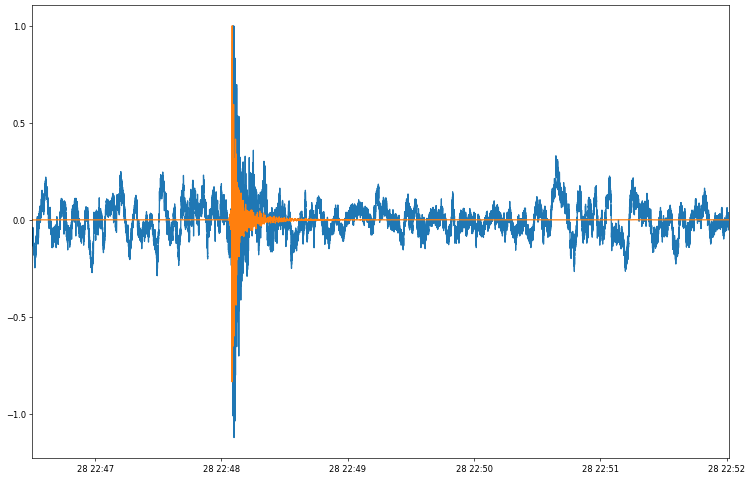

In [14]:
jointf = plt.figure(figsize=[15,10], dpi=60)
jointx = jointf.subplots(1)
jointx.plot(infra_time_d64,infraN, sismo_d64N ,sismoN)
#jointx.set_xlim(d64[0],sismo_d64N[-1])
jointx.set_xlim(infra_time_d64[iminM], infra_time_d64[imaxM])
jointx.margins(y=0.05)

## 2. Transformada Wavelet
Wavelet  transform  overcomes  the  previous  problem.   The  wavelet  function is designed to strike a balance between time domain (finite length) and frequency domain (finite bandwidth).  As we dilate and translate the mother wavelet, we can see very low frequency components at large $s$ while very high frequency component can be located precisely at small $s$.

#### Transformada Wavelet Continua

La transformada Wavelet Continua de una serie discreta $x_n$ se define como la convolución de $x_n$ con una versión escalada y trasladada de $\psi(\eta)$:<br>
<br>
$$W_n(s) = \displaystyle\sum_{n'=0}^{N-1} x_{n'} \psi' * \left[\frac{(n'-n) \delta t}{s}\right]$$
<br>
donde $\psi *$ indica el complejo conjugado. Variando la escala $s$ y trasladando la $wavelet$ según un índice $n$ es posible construir una imagen que representa la amplitud de un fenómeno en relación a la escala, así como también como dicha amplitud varía en el tiempo.

#### Parametros
>    Input 
    -------
    signal : numpy.ndarray, list | Input signal array.
    dt : float | Sampling interval.
    dj : float, optional | Spacing between discrete scales. Default value is 1/12. Smaller values will result in better scale resolution, but slower calculation and plot.
    s0 : float, optional | Smallest scale of the wavelet. Default value is 2*dt.
    J : float, optional | Number of scales less one. Scales range from s0 up to s0 * 2**(J * dj), which gives a total of (J + 1) scales. Default is J = (log2(N * dt / so)) / dj.
    wavelet : instance of Wavelet class, or string | Mother wavelet class. Default is Morlet wavelet.
    freqs : numpy.ndarray, optional | Custom frequencies to use instead of the ones corresponding to the scales described above. Corresponding scales are calculated using the wavelet Fourier wavelength.

>    Returns
    -------
    W : numpy.ndarray | Wavelet transform according to the selected mother wavelet. Has (J+1) x N dimensions.
    sj : numpy.ndarray | Vector of scale indices given by sj = s0 * 2**(j * dj), j={0, 1, ..., J}.
    freqs : array like | Vector of Fourier frequencies (in 1 / time units) that corresponds to the wavelet scales.
    coi : numpy.ndarray | Returns the cone of influence, which is a vector of N points containing the maximum Fourier period of useful information at that particular time. Periods greater than those are subject to edge effects.
    fft : numpy.ndarray | Normalized fast Fourier transform of the input signal.
    fftfreqs : numpy.ndarray | Fourier frequencies (in 1/time units) for the calculated FFT spectrum.

Se realiza un ensayo con los parámetros por defecto, defininiendo únicamente el número de escalas.

In [15]:
from __future__ import division
import pycwt as wavelet
from pycwt.helpers import find

In [33]:
# We load the dataset and define some data related parameters. In this
# case, the first 19 lines of the data file contain meta-data, that we ignore,
# since we set them manually (*i.e.* title, units).

dat = infra_cropL
N = len(dat)
NL = len(infra_cropL)
NM = len(infra_cropM)
NS = len(infra_cropS)
title = 'CWT - Infrasonido'
label = '2017 03 28'
units = 'Pa'
t0 = 0
dt = 0.01  # En segundos

# We also create a time array.
t = np.arange(0, N) * dt + t0
tL = np.arange(0, NL) * dt + t0
tM = np.arange(0, NM) * dt + t0
tS = np.arange(0, NS) * dt + t0

In [17]:
mother = wavelet.Morlet(6.)
#cwt(signal, dt, dj=1/12, s0=-1, J=-1, wavelet='morlet', freqs=None):
#wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, 0.25, 0.25, 0.5, 28, mother)
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, 2*dt, J=-1)
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

In [20]:
# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha, significance_level=0.95, wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

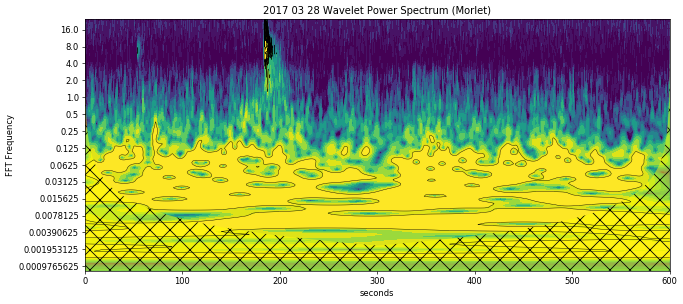

In [23]:
# Normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area.

cwt_straight = plt.figure(figsize=(15,15), dpi=60)
ax = plt.axes([0.1, 0.37, 0.65, 0.28])
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
ax.contourf(t, np.log2(freqs), np.log2(power), np.log2(levels), extend='both', cmap=plt.cm.viridis)
extent = [t.min(), t.max(), 0, max(freqs)]
ax.contour(t, np.log2(freqs), sig95, [-99, 1], colors='k', linewidths=.5, extent=extent)
ax.fill_between(t, np.log2(freqs.min()), np.log2(1/coi),facecolor='yellow', alpha=0.5, hatch='X')
ax.set_title('{} Wavelet Power Spectrum ({})'.format(label, mother.name))
ax.set_ylabel('FFT Frequency')
ax.set_xlabel('seconds')
Yticks = 2 ** np.arange(np.ceil(np.log2(freqs.min())), np.ceil(np.log2(freqs.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
#ax.set_xlim([90, 150])
ax.set_ylim([np.log2(freqs.min()),np.log2(freqs.max())])
ax.margins(x=0,y=0)
plt.show()

# zoom en el inlet

Siguiendo lo postulado por Torrence y Compo, es recomendable hacer un tratamiento más elaborado de los de datos, para obtener resultados que sean comparablas de una serie a otra.

### 2.1 Normalización
Para asegurar que las transformadas a cada escala son directamente comparables unas a otras y a transformadas de otras series, la función wavelet a cada escala $s$ se normaliza para tener energía unitaria:
$$\hat{\psi}(sw_k) = \left( \frac{2 \pi s}{\delta t} \right)^½ \hat{\psi}_0(s \omega_k)$$
<br>
$$ \int^{-\infty}_{+\infty} |\hat{\psi} (\omega')|^2 \, d\omega'=1 $$
<br>
$$ \displaystyle\sum_{k=0}^{N-1} |\hat{\psi} (s\omega_k)|^2=1$$
<br>
$$ \psi \left[\frac{(n'-n) \delta t}{s}\right]= \left( \frac{\delta t}{s}\right)^½ \psi_0 \left[\frac{(n'-n) \delta t}{s}\right]$$

<br>


>    We write the following code to detrend and normalize the input data by its standard deviation. Sometimes detrending is not necessary and simply removing the mean value is good enough. However, if your dataset has a well defined trend,it is strongly advised to perform detrending. Here, we fit a one-degree polynomial function and then subtract it from the original data.

In [24]:
p = np.polyfit(t, dat, 1)
dat_notrend = dat - np.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

#### Escalas

Para wavelets ortogonales las escalas están limitadas. Para análisis de wavelets no ortogonales, es posible utilizar cualquier número arbitrario de escalas. Es conveniente expresar las escalas como potencias fraccionarias de 2, <br>
<br>
$$ s_j = s_0 2^{j\delta j},\; j=0,1, \dots,J$$
<br> de modo que la menor escala posible estará determinada al menos por dos puntos de la traza considerada, es decir:<br>
$$j=0 , \; s_j=s_0$$ 
$$s_{0} = 2 \delta t$$
<br> En tanto la mayor escala será la que abarque el total de la señal analizada:<br>
$$s_{J} = N \delta t$$
$$ J = (\delta j)^{-1} log_2(N\delta t /s_0)$$

#### Efecto del número de sub-octavas por octavas, $dj$

In [25]:
dt = 0.01
s0 = 2 * dt  # Starting scale, in this case 2 * 0.01 seconds = 0.02 seconds
# For comparison, we use 3 different sets of sub-octaves, varying dj:
dj0 = 1 / 24
dj1 = 1 / 12  # Twelve sub-octaves per octaves
dj2 = 1 / 6

> The following routines perform the wavelet transform and inverse wavelet transform using the parameters defined above. Since we have normalized our input time-series, we multiply the inverse transform by the standard deviation.

In [26]:
#signal, dt, dj, s0,J, wave, freq

wave0, scales0, freqs0, coi0, fft0, fftfreqs0 = wavelet.cwt(dat_norm, dt, dj0, s0, wavelet=mother)
iwave = wavelet.icwt(wave0, scales0, dt, dj0, mother) * std

wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = wavelet.cwt(dat_norm, dt, dj1, s0, wavelet=mother)
iwave1 = wavelet.icwt(wave1, scales1, dt, dj1, mother) * std

wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = wavelet.cwt(dat_norm, dt, dj2, s0, wavelet=mother)
iwave2 = wavelet.icwt(wave2, scales2, dt, dj2, mother) * std

In [28]:
# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power0 = (np.abs(wave0)) ** 2
fft_power0 = np.abs(fft0) ** 2
period0 = 1 / freqs0
#signif0, fft_theor = wavelet.significance(1.0, dt, scales0, 0, alpha, significance_level=0.95, wavelet=mother)
#sig950 = np.ones([1, N]) * signif0[:, None]
#sig950 = power0 / sig950

power1 = (np.abs(wave1)) ** 2
fft_power1 = np.abs(fft1) ** 2
period1 = 1 / freqs1
#signif1, fft_theor = wavelet.significance(1.0, dt, scales1, 0, alpha, significance_level=0.95, wavelet=mother)
#sig951 = np.ones([1, N]) * signif1[:, None]
#sig951 = power1 / sig951

power2 = (np.abs(wave2)) ** 2
fft_power2 = np.abs(fft2) ** 2
period2 = 1 / freqs2
#signif2, fft_theor = wavelet.significance(1.0, dt, scales2, 0, alpha, significance_level=0.95, wavelet=mother)
#sig952 = np.ones([1, N]) * signif2[:, None]
#sig952 = power2 / sig952


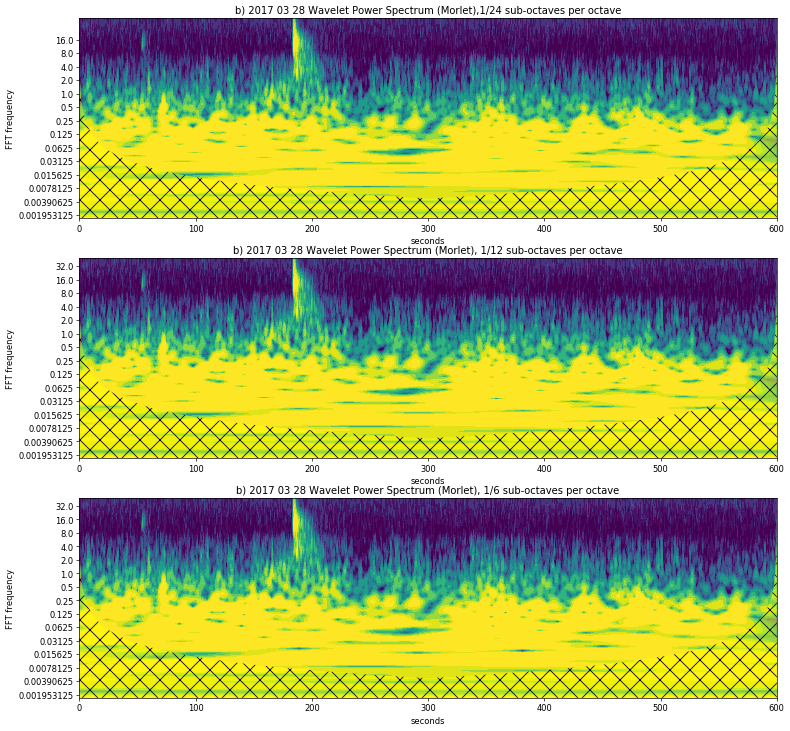

In [29]:
cwt_scales = plt.figure(figsize=(15, 15), dpi=60)
ax,bx,cx = cwt_scales.subplots(3)
# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
#straight.plt(cwt_straight)

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
ax.contourf(t, np.log2(freqs0), np.log2(power0), np.log2(levels), extend='both', cmap=plt.cm.viridis)
ax.fill_between(t, np.log2(freqs0.min()), np.log2(1/coi0),facecolor='yellow', alpha=0.5, hatch='X')
ax.set_title('b) {} Wavelet Power Spectrum ({}),1/24 sub-octaves per octave'.format(label, mother.name))
ax.set_ylabel('FFT frequency')
ax.set_xlabel('seconds')
Yticks = 2 ** np.arange(np.ceil(np.log2(freqs.min())), np.ceil(np.log2(freqs.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
#ax.set_xlim([90, 150])
ax.set_ylim([np.log2(freqs2.min()), np.log2(freqs2.max())])
ax.margins(x=0,y=0)

bx.contourf(t, np.log2(freqs1), np.log2(power1), np.log2(levels), extend='both', cmap=plt.cm.viridis)
bx.fill_between(t, np.log2(freqs1.min()), np.log2(1/coi1),facecolor='yellow', alpha=0.5, hatch='X')
bx.set_title('b) {} Wavelet Power Spectrum ({}), 1/12 sub-octaves per octave'.format(label, mother.name))
bx.set_ylabel('FFT frequency')
bx.set_xlabel('seconds')
Yticks1 = 2 ** np.arange(np.ceil(np.log2(freqs1.min())), np.ceil(np.log2(freqs1.max())))
bx.set_yticks(np.log2(Yticks1))
bx.set_yticklabels(Yticks1)
#bx.set_xlim([90, 150])
bx.set_ylim([np.log2(freqs1.min()), np.log2(freqs1.max())])
bx.margins(x=0,y=0)

cx.contourf(t, np.log2(freqs2), np.log2(power2), np.log2(levels), extend='both', cmap=plt.cm.viridis)
cx.fill_between(t, np.log2(freqs2.min()), np.log2(1/coi2),facecolor='yellow', alpha=0.5, hatch='X')
cx.set_title('b) {} Wavelet Power Spectrum ({}), 1/6 sub-octaves per octave'.format(label, mother.name))
cx.set_ylabel('FFT frequency')
cx.set_xlabel('seconds')
Yticks2 = 2 ** np.arange(np.ceil(np.log2(freqs2.min())), np.ceil(np.log2(freqs2.max())))
cx.set_yticks(np.log2(Yticks2))
cx.set_yticklabels(Yticks2)
#cx.set_xlim([90, 150])
cx.set_ylim([np.log2(freqs2.min()), np.log2(freqs2.max())])
cx.margins(x=0,y=0)

plt.show()

# hacerlo en zoom sobre la parte de interés, agregar sig95

#### Efecto de la normalización (de-trending) sobre la traza analizada

# normalización ponerlo al principio

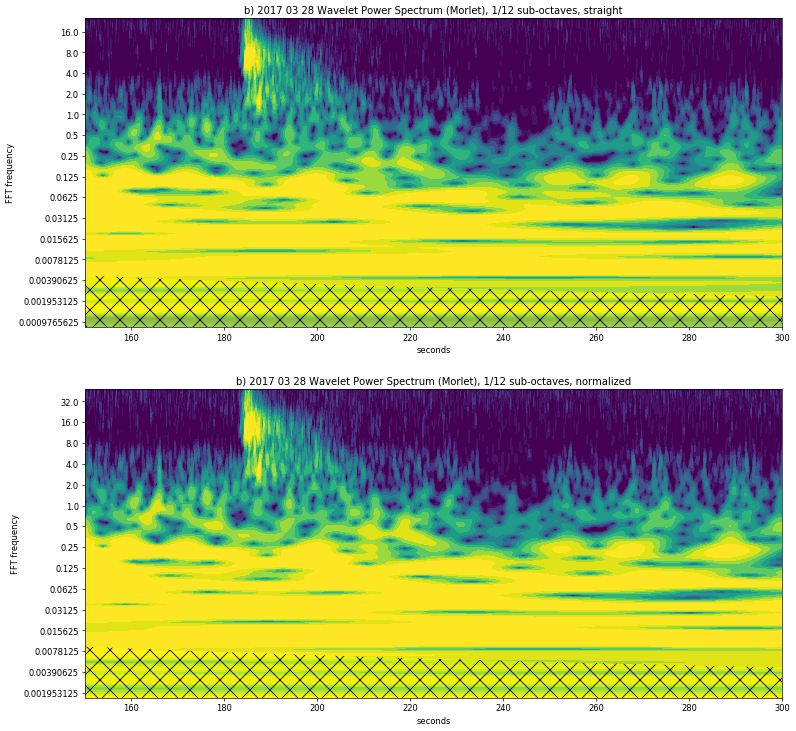

In [25]:
cwt_straight_vs_norm = plt.figure(figsize=(15, 15), dpi=60)
ax,bx = cwt_straight_vs_norm.subplots(2)
# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
#straight.plt(cwt_straight)
xmin, xmax = 150, 300
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
ax.contourf(t, np.log2(freqs), np.log2(power), np.log2(levels), extend='both', cmap=plt.cm.viridis)
#extent = [t.min(), t.max(), 0, max(freqs)]
ax.fill_between(t, np.log2(freqs.min()), np.log2(1/coi),facecolor='yellow', alpha=0.5, hatch='X')
ax.set_title('b) {} Wavelet Power Spectrum ({}), 1/12 sub-octaves, straight'.format(label, mother.name))
ax.set_ylabel('FFT frequency')
ax.set_xlabel('seconds')
Yticks = 2 ** np.arange(np.ceil(np.log2(freqs.min())), np.ceil(np.log2(freqs.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.set_ylim([np.log2(freqs.min()), np.log2(freqs.max())])
ax.set_xlim([xmin, xmax])
ax.margins(x=0,y=0)

bx.contourf(t, np.log2(freqs1), np.log2(power1), np.log2(levels), extend='both', cmap=plt.cm.viridis)
bx.fill_between(t, np.log2(freqs1.min()), np.log2(1/coi1),facecolor='yellow', alpha=0.5, hatch='X')
bx.set_title('b) {} Wavelet Power Spectrum ({}), 1/12 sub-octaves, normalized'.format(label, mother.name))
bx.set_ylabel('FFT frequency')
bx.set_xlabel('seconds')
Yticks1 = 2 ** np.arange(np.ceil(np.log2(freqs1.min())), np.ceil(np.log2(freqs1.max())))
bx.set_yticks(np.log2(Yticks1))
bx.set_yticklabels(Yticks1)
bx.set_ylim([np.log2(freqs1.min()), np.log2(freqs1.max())])
bx.set_xlim([xmin, xmax])
bx.margins(x=0,y=0)
plt.show()

#### COI en función del tamaño de la traza analizada

In [31]:
dt = 0.01
s0 = 2 * dt  # Starting scale, in this case 2 * 0.01 seconds = 0.02 seconds
dj = 1 / 12  # Twelve sub-octaves per octaves

waveL, scalesL, freqsL, coiL, fftL, fftfreqsL = wavelet.cwt(infra_cropL, dt, dj, s0, wavelet=mother)
iwaveL = wavelet.icwt(waveL, scalesL, dt, dj, mother) * std

waveM, scalesM, freqsM, coiM, fftM, fftfreqsM = wavelet.cwt(infra_cropM, dt, dj, s0, wavelet=mother)
iwaveM = wavelet.icwt(waveM, scalesM, dt, dj, mother) * std

waveS, scalesS, freqsS, coiS, fftS, fftfreqsS = wavelet.cwt(infra_cropS, dt, dj, s0, wavelet=mother)
iwaveS = wavelet.icwt(waveS, scalesS, dt, dj, mother) * std

powerL = (np.abs(waveL)) ** 2
fft_powerL = np.abs(fftL) ** 2
#periodL = 1 / freqsL
#signif0, fft_theor = wavelet.significance(1.0, dt, scales0, 0, alpha, significance_level=0.95, wavelet=mother)
#sig950 = np.ones([1, N]) * signif0[:, None]
#sig950 = power0 / sig950

powerM = (np.abs(waveM)) ** 2
fft_powerM = np.abs(fftM) ** 2
#periodM = 1 / freqsM
#signif1, fft_theor = wavelet.significance(1.0, dt, scales1, 0, alpha, significance_level=0.95, wavelet=mother)
#sig951 = np.ones([1, N]) * signif1[:, None]
#sig951 = power1 / sig951

powerS = (np.abs(waveS)) ** 2
fft_powerS = np.abs(fftS) ** 2
#period2 = 1 / freqsS

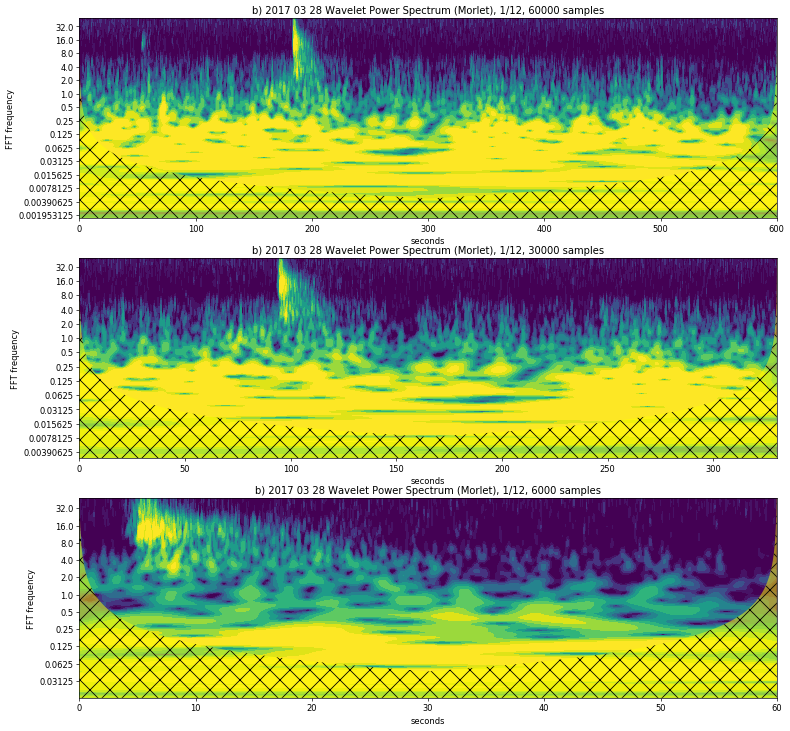

In [35]:
cwt_coi = plt.figure(figsize=(15, 15), dpi=60)
ax,bx,cx = cwt_coi.subplots(3)

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
ax.contourf(tL, np.log2(freqsL), np.log2(powerL), np.log2(levels), extend='both', cmap=plt.cm.viridis)
ax.fill_between(tL, np.log2(freqsL.min()), np.log2(1/coiL),facecolor='yellow', alpha=0.5, hatch='X')
ax.set_title('b) {} Wavelet Power Spectrum ({}), 1/12, 60000 samples'.format(label, mother.name))
ax.set_ylabel('FFT frequency')
ax.set_xlabel('seconds')
Yticks = 2 ** np.arange(np.ceil(np.log2(freqsL.min())), np.ceil(np.log2(freqsL.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
#ax.set_xlim([90, 150])
ax.set_ylim([np.log2(freqsL.min()), np.log2(freqsL.max())])
ax.margins(x=0,y=0)

bx.contourf(tM, np.log2(freqsM), np.log2(powerM), np.log2(levels), extend='both', cmap=plt.cm.viridis)
bx.fill_between(tM, np.log2(freqsM.min()), np.log2(1/coiM),facecolor='yellow', alpha=0.5, hatch='X')
bx.set_title('b) {} Wavelet Power Spectrum ({}), 1/12, 30000 samples'.format(label, mother.name))
bx.set_ylabel('FFT frequency')
bx.set_xlabel('seconds')
Yticks1 = 2 ** np.arange(np.ceil(np.log2(freqsM.min())), np.ceil(np.log2(freqsM.max())))
bx.set_yticks(np.log2(Yticks1))
bx.set_yticklabels(Yticks1)
#bx.set_xlim([90, 150])
bx.set_ylim([np.log2(freqsM.min()), np.log2(freqsM.max())])
bx.margins(x=0,y=0)

cx.contourf(tS, np.log2(freqsS), np.log2(powerS), np.log2(levels), extend='both', cmap=plt.cm.viridis)
cx.fill_between(tS, np.log2(freqsS.min()), np.log2(1/coiS),facecolor='yellow', alpha=0.5, hatch='X')
cx.set_title('b) {} Wavelet Power Spectrum ({}), 1/12, 6000 samples'.format(label, mother.name))
cx.set_ylabel('FFT frequency')
cx.set_xlabel('seconds')
Yticks2 = 2 ** np.arange(np.ceil(np.log2(freqsS.min())), np.ceil(np.log2(freqsS.max())))
cx.set_yticks(np.log2(Yticks2))
cx.set_yticklabels(Yticks2)
#cx.set_xlim([90, 150])
cx.set_ylim([np.log2(freqsS.min()), np.log2(freqsS.max())])
cx.margins(x=0,y=0)

plt.show()

# zoom en los 3 sobre el area de interés (igualar $t_0$), agregar sig95

## 3. Descomposición Empírica de Modos (EMD)



In [36]:
from PyEMD import EMD
IMFs = EMD(dat)

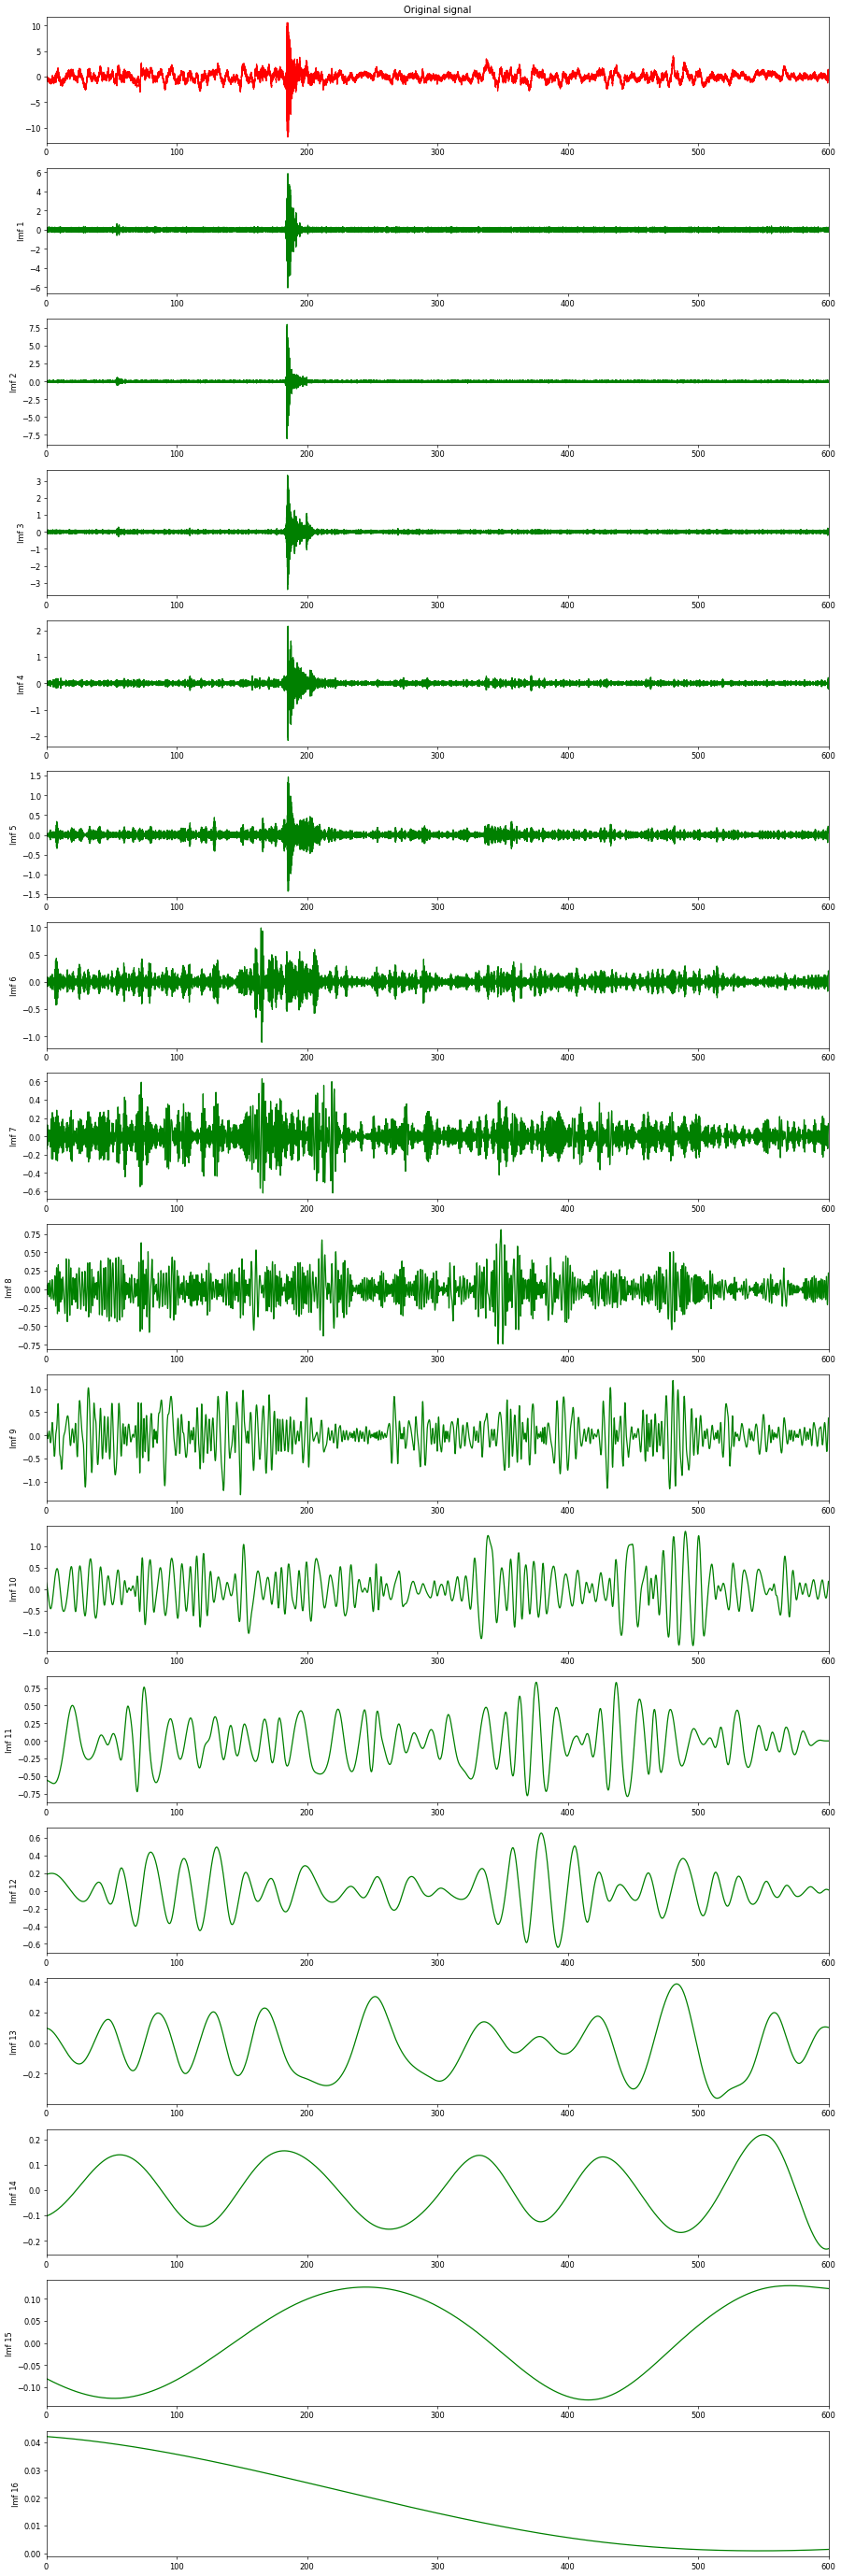

In [37]:
# EMD options
max_imf = -1
DTYPE = np.float64

# Signal options

#dat = signal[40000:60000]

#title = 'Una traza de infrasonido de porqueria'
#label = '2017 03 28'
#units = 'Pa'
#t0 = 0
#dt = 0.01  # En segundos
#t = 
#N0 = len(signal)
T = t # np.arange(0, N0) * dt + t0
S = np.array(dat)
tMin, tMax = t[0], t[-1]

# Prepare and run EMD
emd = EMD()
emd.FIXE_H = 5
emd.nbsym = 2
emd.spline_kind = 'cubic'
emd.DTYPE = DTYPE

imfs = emd.emd(S, T, max_imf)
imfNo = imfs.shape[0]

# Plot results
c = 1
r = np.ceil((imfNo+1)/c)

plt.ioff()
plt.figure(figsize=(18, 60), dpi=60) # (width, height) in inches.
plt.subplot(r, c, 1)
plt.plot(T, S, 'r')
plt.xlim((tMin, tMax))
plt.title("Original signal")

for num in range(imfNo):
    plt.subplot(r,c,num+2)
    plt.plot(T, imfs[num], 'g')
    plt.xlim((tMin, tMax))
    plt.ylabel("Imf "+str(num+1))

#plt.tight_layout()
plt.show()

Suma de 3 o 4 primeros modos (sum3, sum4), transformada wavelet de eso, y coherencia con el sismografo. <br>
Transformada de Hilbert sobre sum3/4 para saber el contenido de frecuencias. <br>

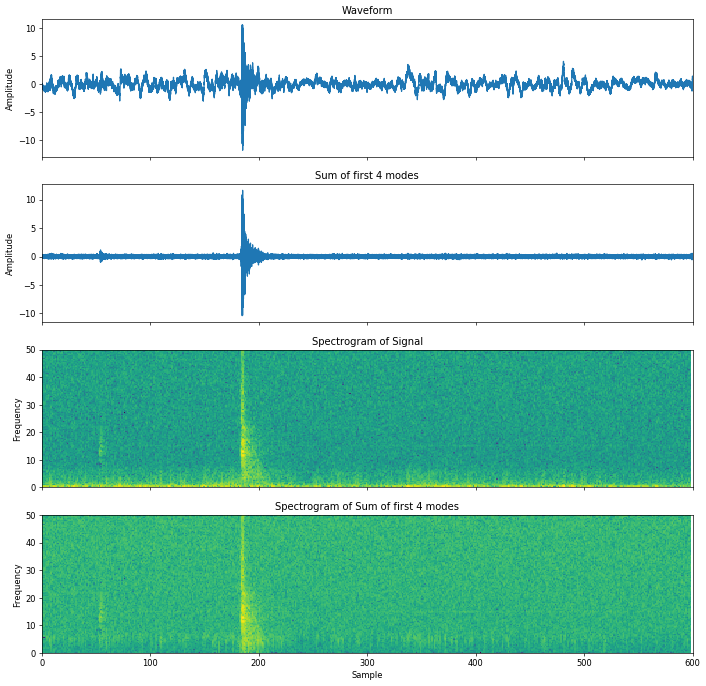

In [38]:
sum4 = np.zeros([np.size(imfs[0])])
n=0
for modo in imfs[:4]:
    n=n+1
    sum4 = sum4 + modo

emd_fft = plt.figure(figsize=(14, 14), dpi=60)
ax111, ax112, ax113, ax114 = emd_fft.subplots(nrows=4, sharex=True)
#fig11 = plt.figure(figsize=(16, 20), dpi=60) # (width, height) in inches.
#ax111 , ax112, ax113, ax114 = fig11.subplots(4)

ax111.plot(T,S)
ax111.set_title('Waveform')
#ax111.set_xlabel('Time')
ax111.set_ylabel('Amplitude')
ax111.margins(0,0.05)

ax112.plot(T,sum4)
ax112.set_title('Sum of first 4 modes')
#ax112.set_xlabel('Time')
ax112.set_ylabel('Amplitude')
ax112.margins(0,0.05)

ax113.specgram(S,Fs=100)
ax113.set_title('Spectrogram of Signal')
#ax113.set_xlabel('Sample')
ax113.set_ylabel('Frequency')
ax113.margins(0,0)

ax114.specgram(sum4,Fs=100)
ax114.set_title('Spectrogram of Sum of first 4 modes')
ax114.set_xlabel('Sample')
ax114.set_ylabel('Frequency')
ax114.margins(0,0)

plt.show()

#### Transformada Wavelet de la suma de los primeros 4 modos

In [39]:
dj, J = dj1, -1
wave4, scales4, freqs4, coi4, fft4, fftfreqs4 = wavelet.cwt(sum4, dt, dj, s0, J, mother)
iwave4 = wavelet.icwt(wave4, scales4, dt, dj, mother) * std
power4 = (np.abs(wave4)) ** 2
fft_power4 = np.abs(fft4) ** 2
period4 = 1 / freqs4

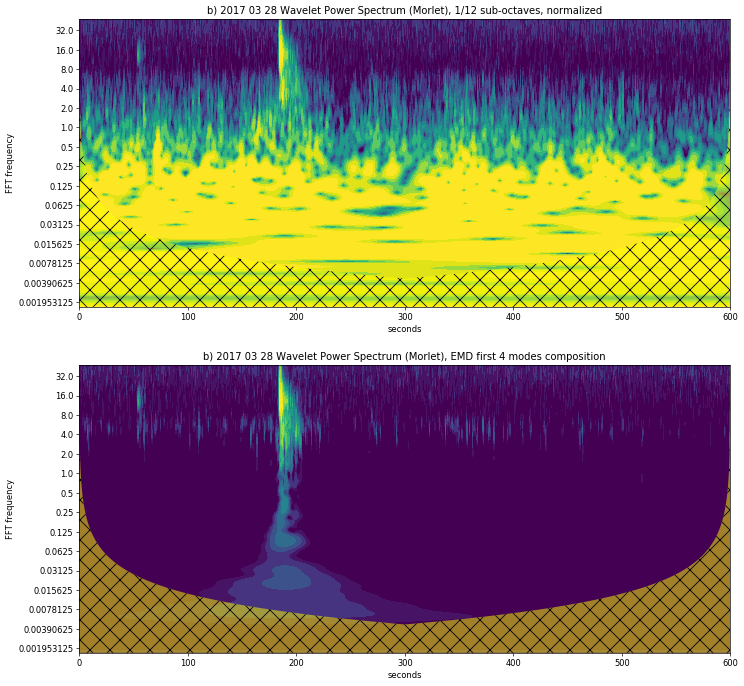

In [40]:
cwt_vs_emdcwt = plt.figure(figsize=(14, 14), dpi=60)
ax,bx = cwt_vs_emdcwt.subplots(2)

ymax = min(np.log2(freqs4.max()), np.log2(freqs0.max()))
ymin = max(np.log2(freqs4.min()), np.log2(freqs0.min()))

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
ax.contourf(t, np.log2(freqs1), np.log2(power1), np.log2(levels), extend='both', cmap=plt.cm.viridis)
ax.fill_between(t, np.log2(freqs1.min()), np.log2(1/coi1),facecolor='yellow', alpha=0.5, hatch='X')
ax.set_title('b) {} Wavelet Power Spectrum ({}), 1/12 sub-octaves, normalized'.format(label, mother.name))
ax.set_ylabel('FFT frequency')
ax.set_xlabel('seconds')
Yticks = 2 ** np.arange(np.ceil(np.log2(freqs1.min())), np.ceil(np.log2(freqs1.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
#ax.set_xlim([90, 150])
ax.set_ylim([ymin, ymax])
ax.margins(x=0,y=0)

bx.contourf(t, np.log2(freqs4), np.log2(power4), np.log2(levels), extend='both', cmap=plt.cm.viridis)
bx.fill_between(t, np.log2(freqs4.min()), np.log2(1/coi4),facecolor='yellow', alpha=0.5, hatch='X')
bx.set_title('b) {} Wavelet Power Spectrum ({}), EMD first 4 modes composition'.format(label, mother.name))
bx.set_ylabel('FFT frequency')
bx.set_xlabel('seconds')
Yticks1 = 2 ** np.arange(np.ceil(np.log2(freqs4.min())), np.ceil(np.log2(freqs4.max())))
bx.set_yticks(np.log2(Yticks1))
bx.set_yticklabels(Yticks1)
#bx.set_xlim([90, 150])
bx.set_ylim([ymin, ymax])
bx.margins(x=0,y=0)

plt.show()

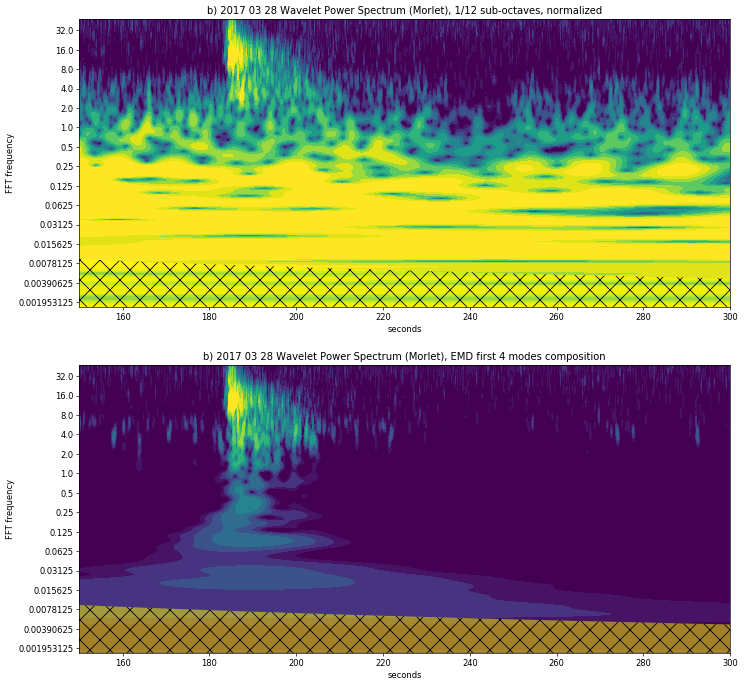

In [43]:
xmin, xmax = 150,300
ax.set_xlim([xmin, xmax])
bx.set_xlim([xmin, xmax])
cwt_vs_emdcwt
#plt.show()

Comparacion de los FFT de la filtrada y la completa. <br>
Ahora suma de los modos que no usé y espectro de eso. <br>
Datos meteorológicos >>> velocidad de viento, y comparación con los datos de infrasonido en las zonas donde no hay evento V-T. <br>

In [44]:
sum_noise = np.zeros([np.size(imfs[0])])
for modo in imfs[4:]:
    sum_noise = sum_noise + modo

wave_noise, scales_noise, freqs_noise, coi_noise, fft_noise, fftfreqs_noise = wavelet.cwt(sum_noise, dt, dj, s0, J, mother)
iwave_noise = wavelet.icwt(wave_noise, scales_noise, dt, dj1, mother) * std
power_noise = (np.abs(wave_noise)) ** 2
fft_power_noise = np.abs(fft_noise) ** 2
period_noise = 1 / freqs_noise

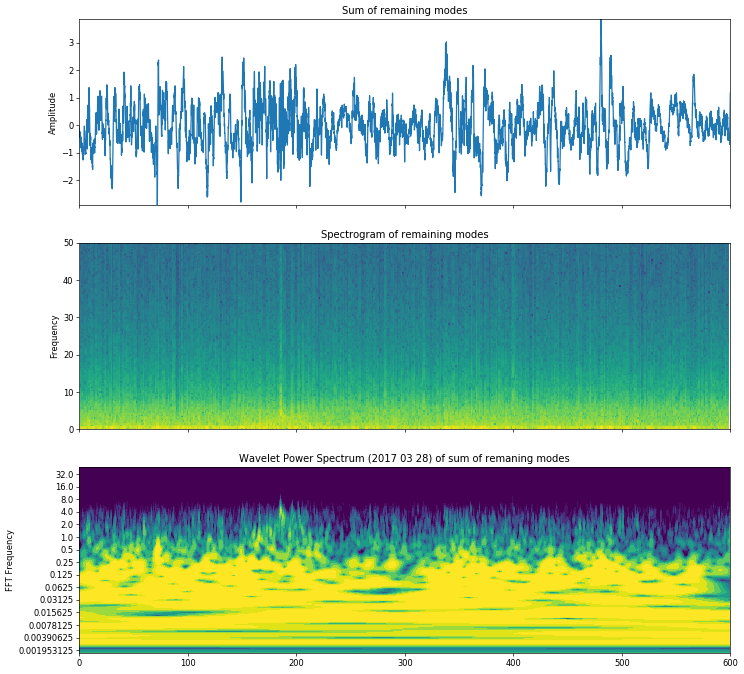

In [46]:
lota_noise = plt.figure(figsize=(14, 14), dpi=60)
ax60, bx60, cx60 = lota_noise.subplots(nrows=3, sharex=True)

#fig60 = plt.figure(figsize=(15, 15), dpi=60) # (width, height) in inches.
#ax60 , bx60, cx60 = fig60.subplots(3)

ax60.plot(T,sum_noise)
ax60.set_title('Sum of remaining modes')
#ax60.set_xlabel('Time')
ax60.set_ylabel('Amplitude')
ax60.margins(0,0)

bx60.specgram(sum_noise,Fs=100)
bx60.set_title('Spectrogram of remaining modes')
#bx60.set_xlabel('Sample')
bx60.set_ylabel('Frequency')

cx60.contourf(t, np.log2(freqs_noise), np.log2(power_noise), np.log2(levels), extend='both', cmap=plt.cm.viridis)
cx60.set_title('Wavelet Power Spectrum ({}) of sum of remaning modes'.format(label, mother.name))
cx60.set_ylabel('FFT Frequency')
Yticks2 = 2 ** np.arange(np.ceil(np.log2(freqs_noise.min())), np.ceil(np.log2(freqs_noise.max())))
cx60.set_yticks(np.log2(Yticks2))
cx60.set_yticklabels(Yticks2)
#cx60.set_xlim([90, 150])
cx60.margins(x=0,y=0)

plt.show()